In [1]:
#import library
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import cm
import pylab as p
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import squarify
from wordcloud import WordCloud

In [2]:
#import dataset
data=pd.read_csv("Liquor Sales (Jan 2021-Jan 2022).csv")

In [3]:
#memanggil dataset
data

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


In [4]:
#menghitung banyak data missing di semua kolom
data.isna().sum() 

invoice_and_item_number         0
date                            0
store_number                    0
store_name                      0
address                       142
city                          142
zip_code                      142
store_location             330335
county_number                 142
county                        142
category                        0
category_name                   0
vendor_number                   4
vendor_name                     4
item_number                     0
item_description                0
pack                            0
bottle_volume_ml                0
state_bottle_cost               0
state_bottle_retail             0
bottles_sold                    0
sale_dollars                    0
volume_sold_liters              0
volume_sold_gallons             0
dtype: int64

In [5]:
#menghapus row yang ada missing data
data=data.dropna() 

In [6]:
#menghitung apakah data missing sudah hilang
data.isna().sum() 

invoice_and_item_number    0
date                       0
store_number               0
store_name                 0
address                    0
city                       0
zip_code                   0
store_location             0
county_number              0
county                     0
category                   0
category_name              0
vendor_number              0
vendor_name                0
item_number                0
item_description           0
pack                       0
bottle_volume_ml           0
state_bottle_cost          0
state_bottle_retail        0
bottles_sold               0
sale_dollars               0
volume_sold_liters         0
volume_sold_gallons        0
dtype: int64

In [7]:
#cek dataset
data ##setelah dicek data berkurang 330,339 data

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,store_location,county_number,county,...,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,POINT (-95.200758 42.65318400000001),11.0,BUENA VIST,...,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.80,1.26
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,POINT (-90.666497 42.49721900000001),31.0,DUBUQUE,...,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.00,0.79
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,POINT (-93.262364 42.508752),42.0,HARDIN,...,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.50,2.77
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,POINT (-93.262446 42.503407),42.0,HARDIN,...,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.00,2.37
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,POINT (-93.741511 41.580206),77.0,POLK,...,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.50,0.39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2805302,INV-41968600007,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,87937,Juarez Silver,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805303,INV-41968600008,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89387,Juarez Gold,12,1000,7.83,11.75,1,11.75,1.00,0.26
2805304,INV-41968600009,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,39492,New Amsterdam Pink Whitney,12,750,7.50,11.25,3,33.75,2.25,0.59
2805305,INV-41968600006,2021-11-14,4617,Lickety Liquor,2501 HUBBELL AVE,Des Moines,50317.0,POINT (-93.570489 41.607817),77.0,POLK,...,89836,Hornitos Reposado,12,750,13.50,20.25,2,40.50,1.50,0.39


## Insight I (Doughnut Chart)

In [8]:
#Mendefinikan 10 data yang akan dipakai untuk melihat total biaya dari kota pemesanan liquor paling sedikit
datadonat=data.groupby(['city'])['sale_dollars'].sum().sort_values(ascending=True).head(10)
datadonat

city
Primghar      4723.44
Malcom        7388.85
Rudd          8086.37
Hospers       8640.67
Casey         9901.80
Delhi        11594.05
Seymour      12337.40
Alburnett    13360.86
Lamont       14517.02
Aurelia      15682.63
Name: sale_dollars, dtype: float64

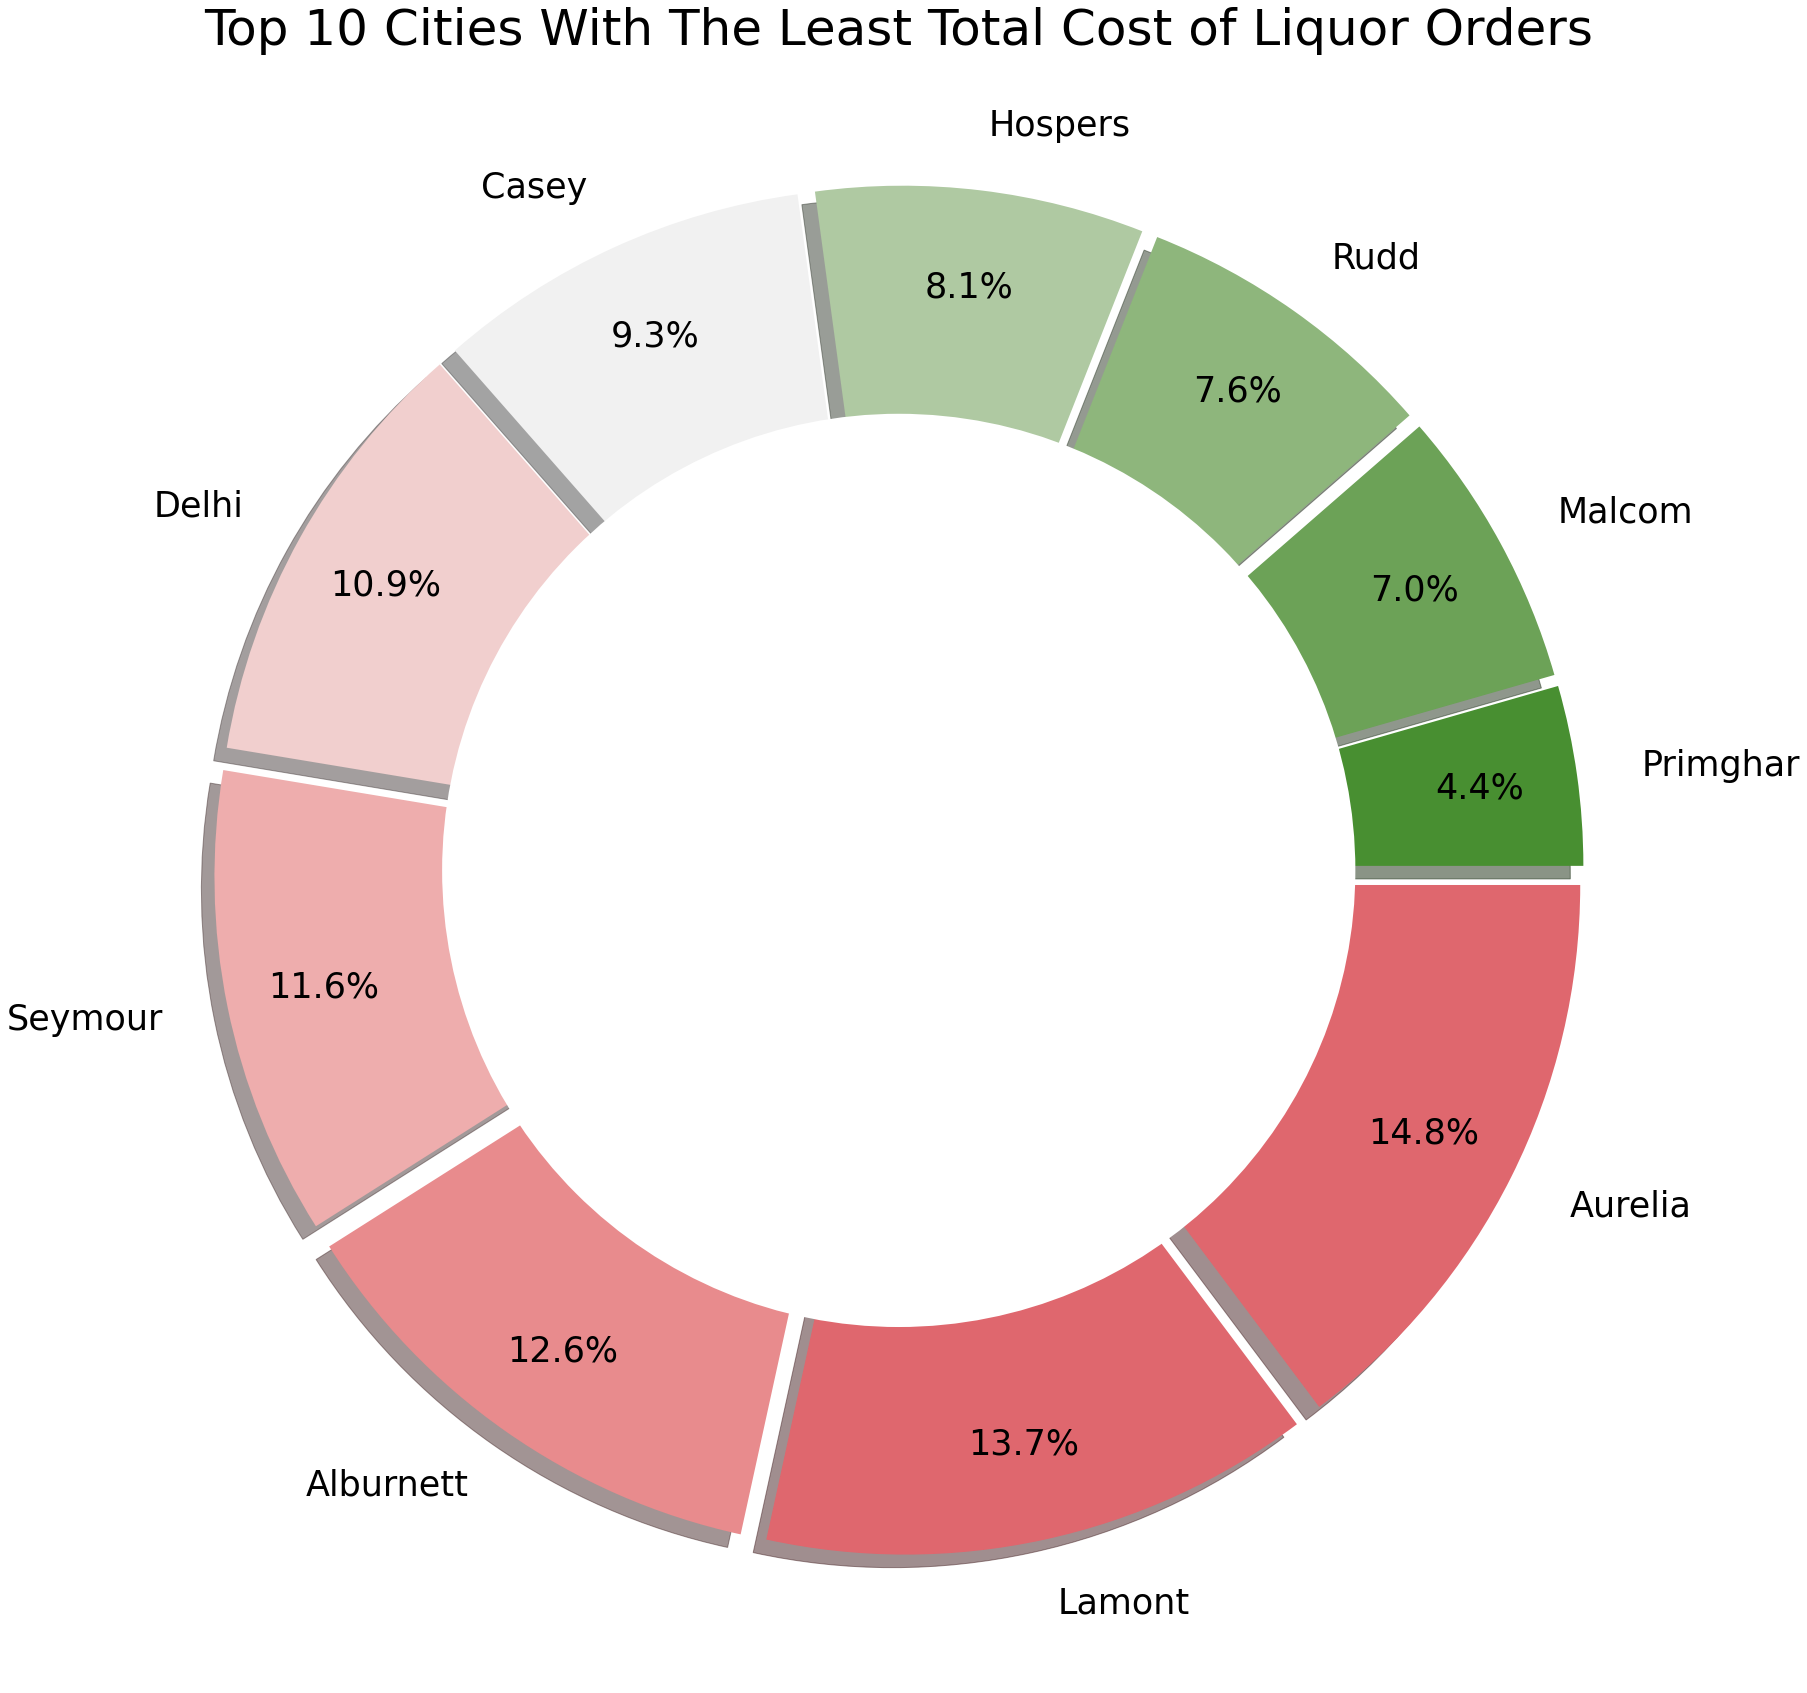

In [10]:
#Membuat nama kota untuk label chart
namakota = ['Primghar', 'Malcom', 'Rudd', 'Hospers', 'Casey', 'Delhi', 'Seymour', 'Alburnett', 'Lamont', 'Aurelia']

#Mengatur warna yang ingin digunakan
colors = ['#488f31', '#6ca257', '#8eb67c', '#afc9a2', '#f1f1f1', '#f1cfce', '#eeadad', '#e88b8d', '#df676e', '#df676e']

#Explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05)

#Mengatur ukuran frame
plt_2 = plt.figure(figsize=(30, 30))

#Doughnut chart
plt.pie(datadonat, colors=colors, labels=namakota,
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode, shadow=True, textprops={'fontsize': 35})
  
#Menggambar lingkaran tengah
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
  
#Menambahkan judul chart
plt.title('Top 10 Cities With The Least Total Cost of Liquor Orders', fontsize=50)
  
#Menampilkan chart
plt.show()

## Insight II (Pie Chart)

In [13]:
#Mendefinikan 10 data yang akan dipakai untuk melihat jumlah botol yang dipesan dari daerah (county) pemesanan liquor paling banyak
datapie=data.groupby('county')[['pack']].sum().nlargest(n=10,columns=['pack']).dropna()
datapie

,pack
county,
POLK,5312155
LINN,2544827
SCOTT,1812177
BLACK HAWK,1707977
JOHNSON,1429601
WOODBURY,1126406
POTTAWATTA,1069086
DUBUQUE,759018
STORY,684442


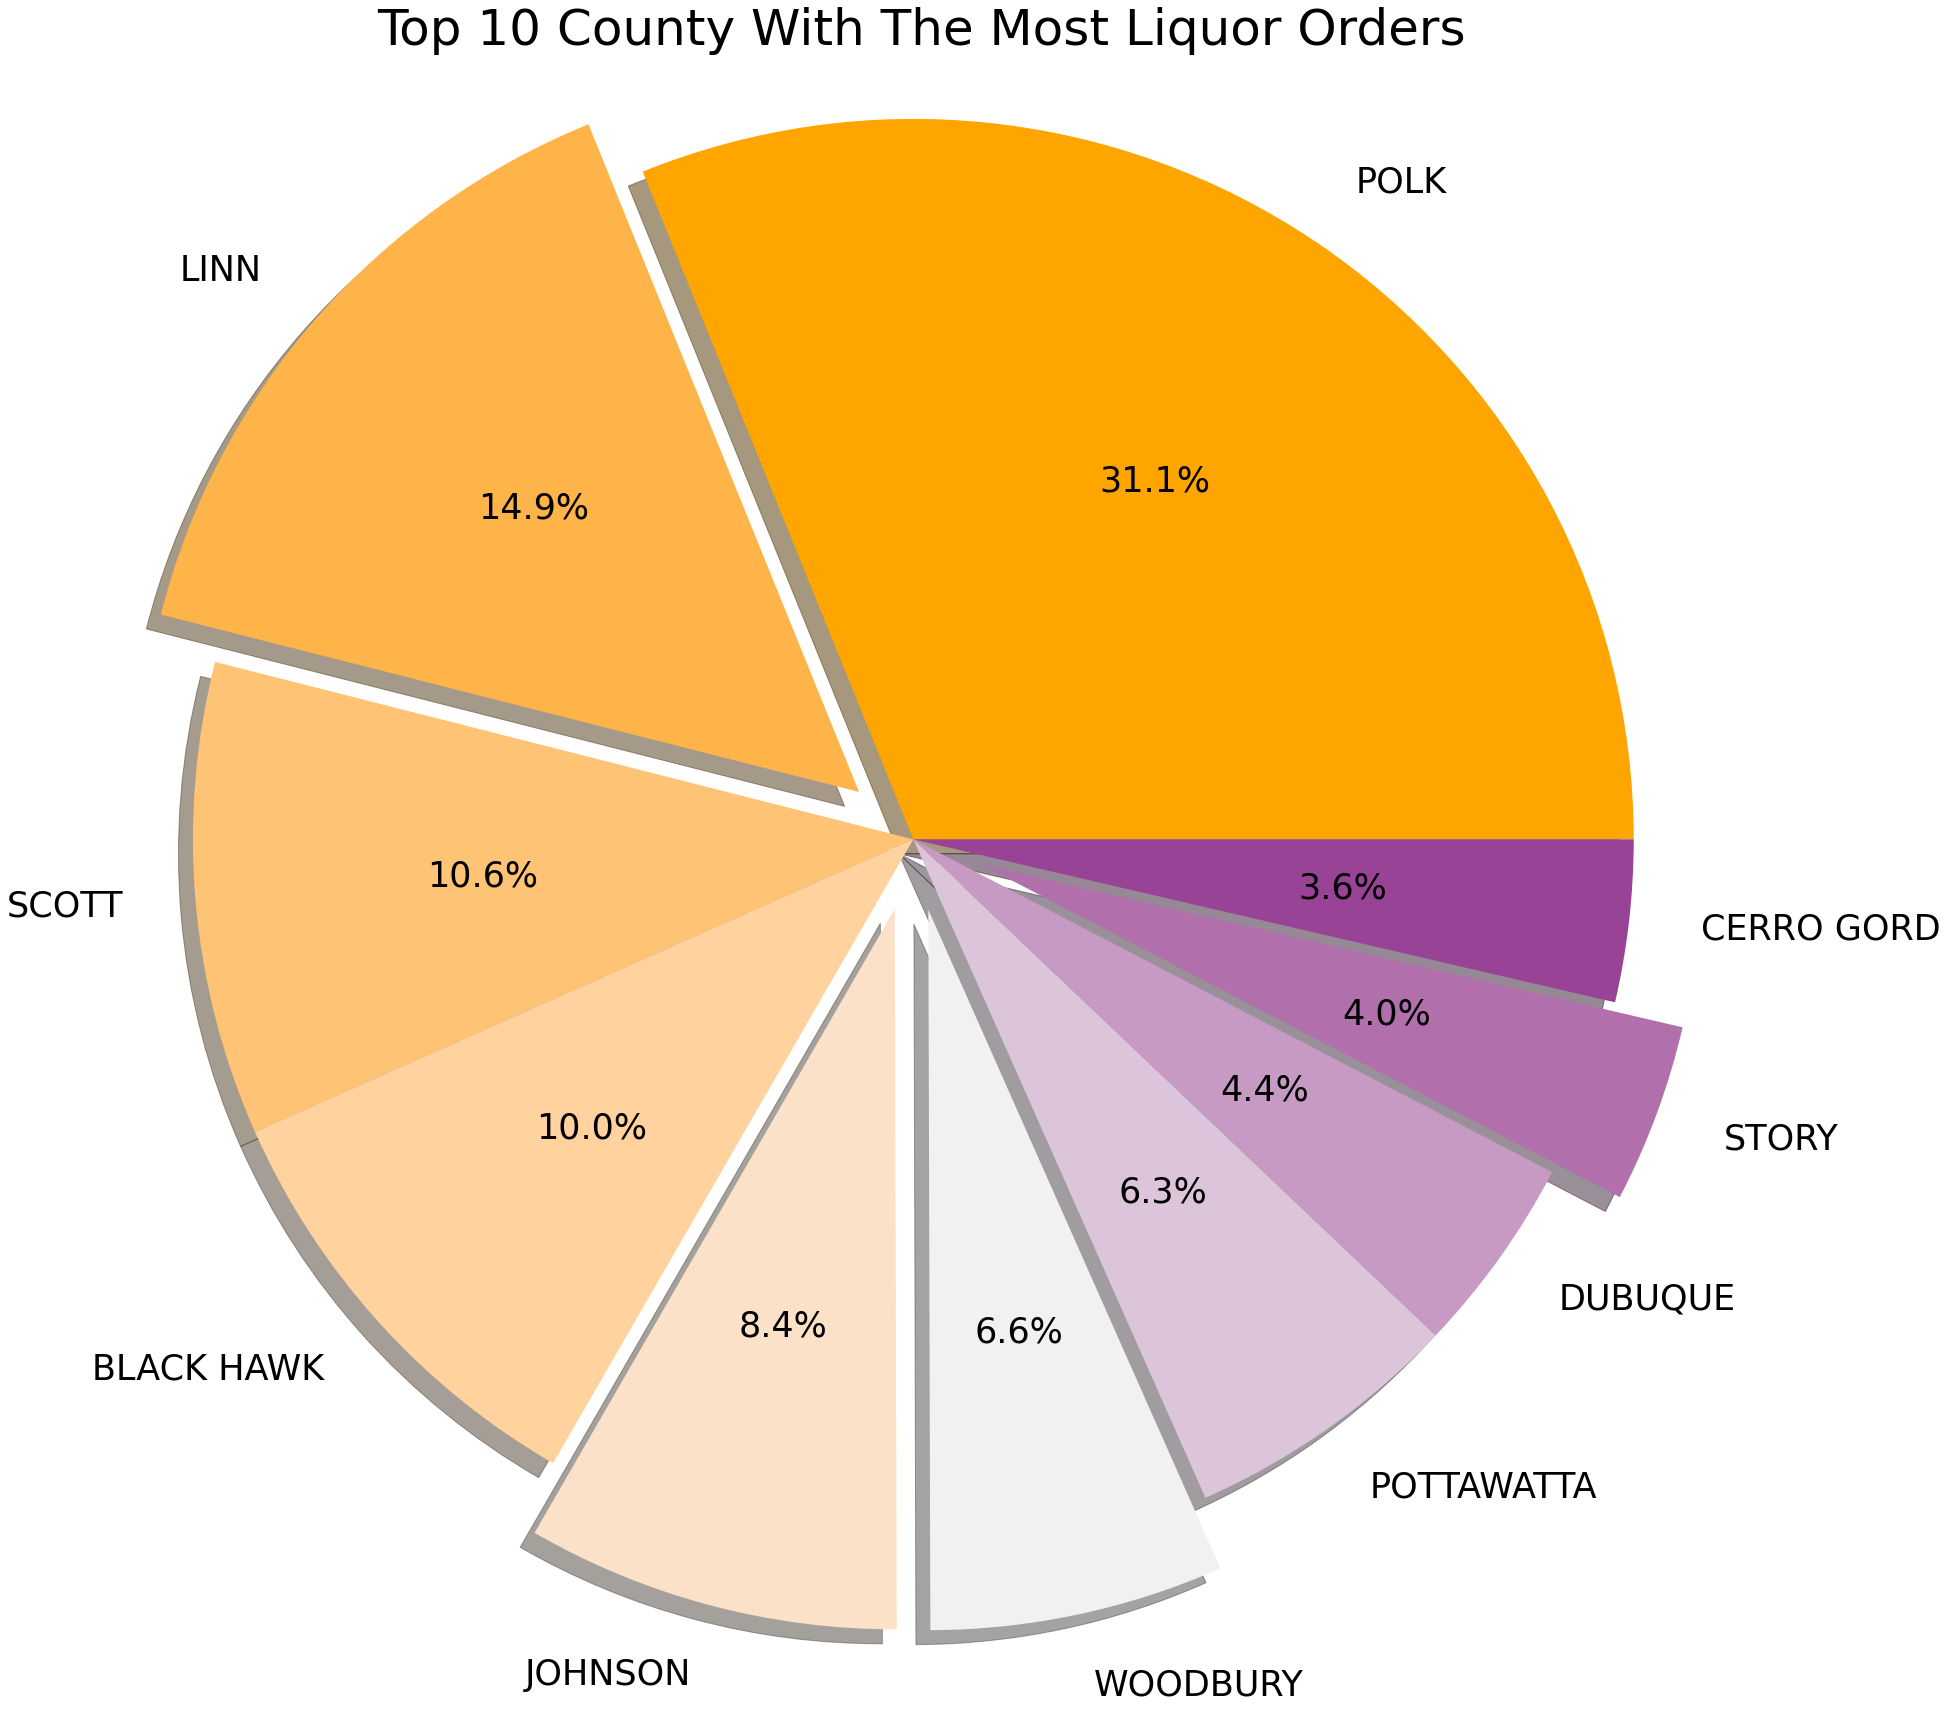

In [26]:
#Mengatur warna yang ingin digunakan
colors = ['#ffa500', '#ffb44a', '#ffc375', '#ffd29e', '#fbe1c7', '#f1f1f1', '#dcc5da', '#c79ac3', '#b170ac', '#994396']

#Mengatur ukuran frame
plt_2 = plt.figure(figsize=(30, 30))

#Mengatur explode
explode = (0, 0.1, 0, 0, 0.1, 0.1, 0, 0, 0.1, 0)

#Pie chart
plt.pie(datapie['pack'], labels=datapie.index, explode=explode, colors=colors, shadow=True, autopct='%1.1f%%', textprops={'fontsize': 35})

#Menambahkan judul chart
plt.title("Top 10 County With The Most Liquor Orders", fontsize=50)
plt.axis('equal')

#Menampilkan chart
plt.show()

## Insight III (Treemap Chart)

In [30]:
#Mendefinikan data yang akan dipakai untuk melihat jumlah botol yang dipesan dari kota pemesan liquor paling banyak
datatree=data.groupby(['city'])['pack'].sum().sort_values(ascending=False).head(10)
datatree

city
Des Moines         2611675
Cedar Rapids       2076012
Davenport          1269497
Sioux City         1019941
Council Bluffs      995195
West Des Moines     981564
Waterloo            913908
Cedar Falls         677641
Dubuque             670335
Iowa City           666530
Name: pack, dtype: int64

(0.0, 100.0, 0.0, 100.0)

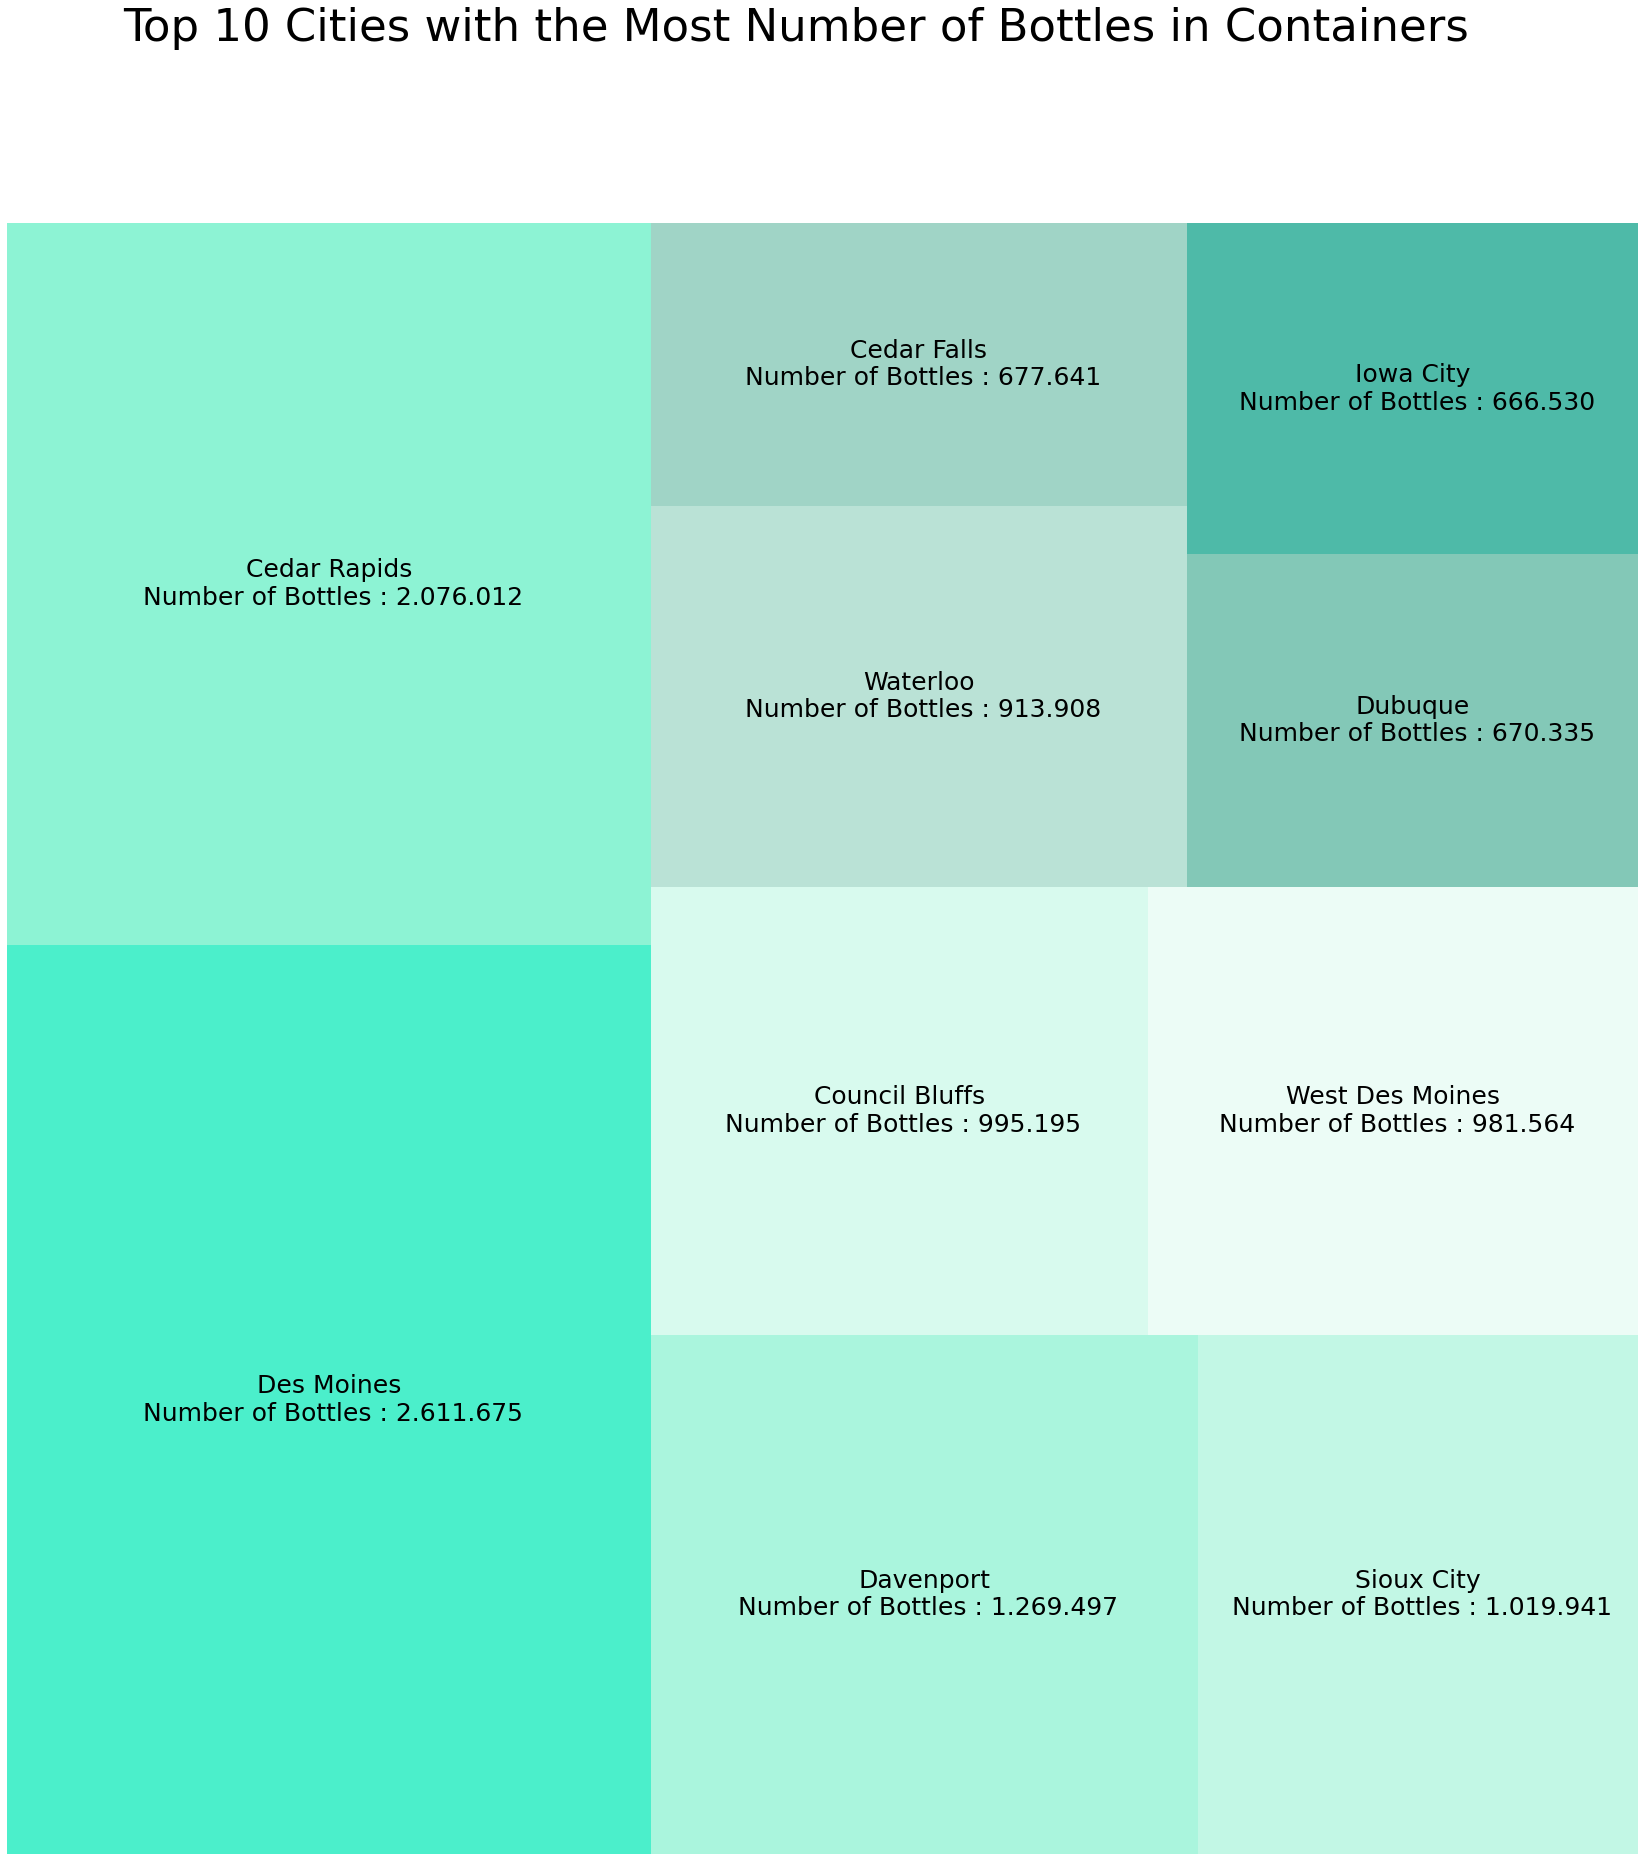

In [31]:
#Mengatur ukuran frame
fig = plt.figure(figsize=(30, 30))

#Mengatur ukuran label
fig.suptitle("Top 10 Cities with the Most Number of Bottles in Containers", fontsize=45)
ax = fig.add_subplot(111, aspect="equal")
label=("Des Moines\n Number of Bottles : 2.611.675", "Cedar Rapids\n Number of Bottles : 2.076.012", "Davenport\n Number of Bottles : 1.269.497", "Sioux City\n Number of Bottles : 1.019.941", "Council Bluffs\n Number of Bottles : 995.195","West Des Moines\n Number of Bottles : 981.564","Waterloo\n Number of Bottles : 913.908","Cedar Falls\n Number of Bottles : 677.641","Dubuque\n Number of Bottles : 670.335","Iowa City\n Number of Bottles : 666.530")

#Mengatur warna yang ingin digunakan
colors=['#00e9b5', '#5deec2', '#87f2cf', '#a9f5db', '#c8f9e8', '#e5fcf3','#9dd6c5', '#78c3ae','#4fb199', '#049e84']

#Treemap chart
squarify.plot(datatreenya, label=label, ax=ax, alpha=.7,color=colors,text_kwargs={'fontsize':25})

#Menghilangkan sumbu x dan y
plt.axis('off')

## Insight IV (Bar Chart)

In [39]:
#Mendefinikan 10 data yang akan dipakai untuk melihat rata-rata jumlah botol yang terjual (ml) per merk liquor 
databar=data.groupby(['category_name'])['bottle_volume_ml'].mean().sort_values(ascending=False).head(10)
databar

category_name
Temporary  & Specialty Packages    1750.000000
Cocktails /RTD                     1476.284784
Imported Vodka                     1138.888889
Gold Rum                           1101.138829
Scotch Whiskies                    1015.413277
White Rum                          1006.850138
American Dry Gins                  1004.463746
American Sloe Gins                 1000.000000
Triple Sec                          952.510786
American Vodkas                     948.035429
Name: bottle_volume_ml, dtype: float64

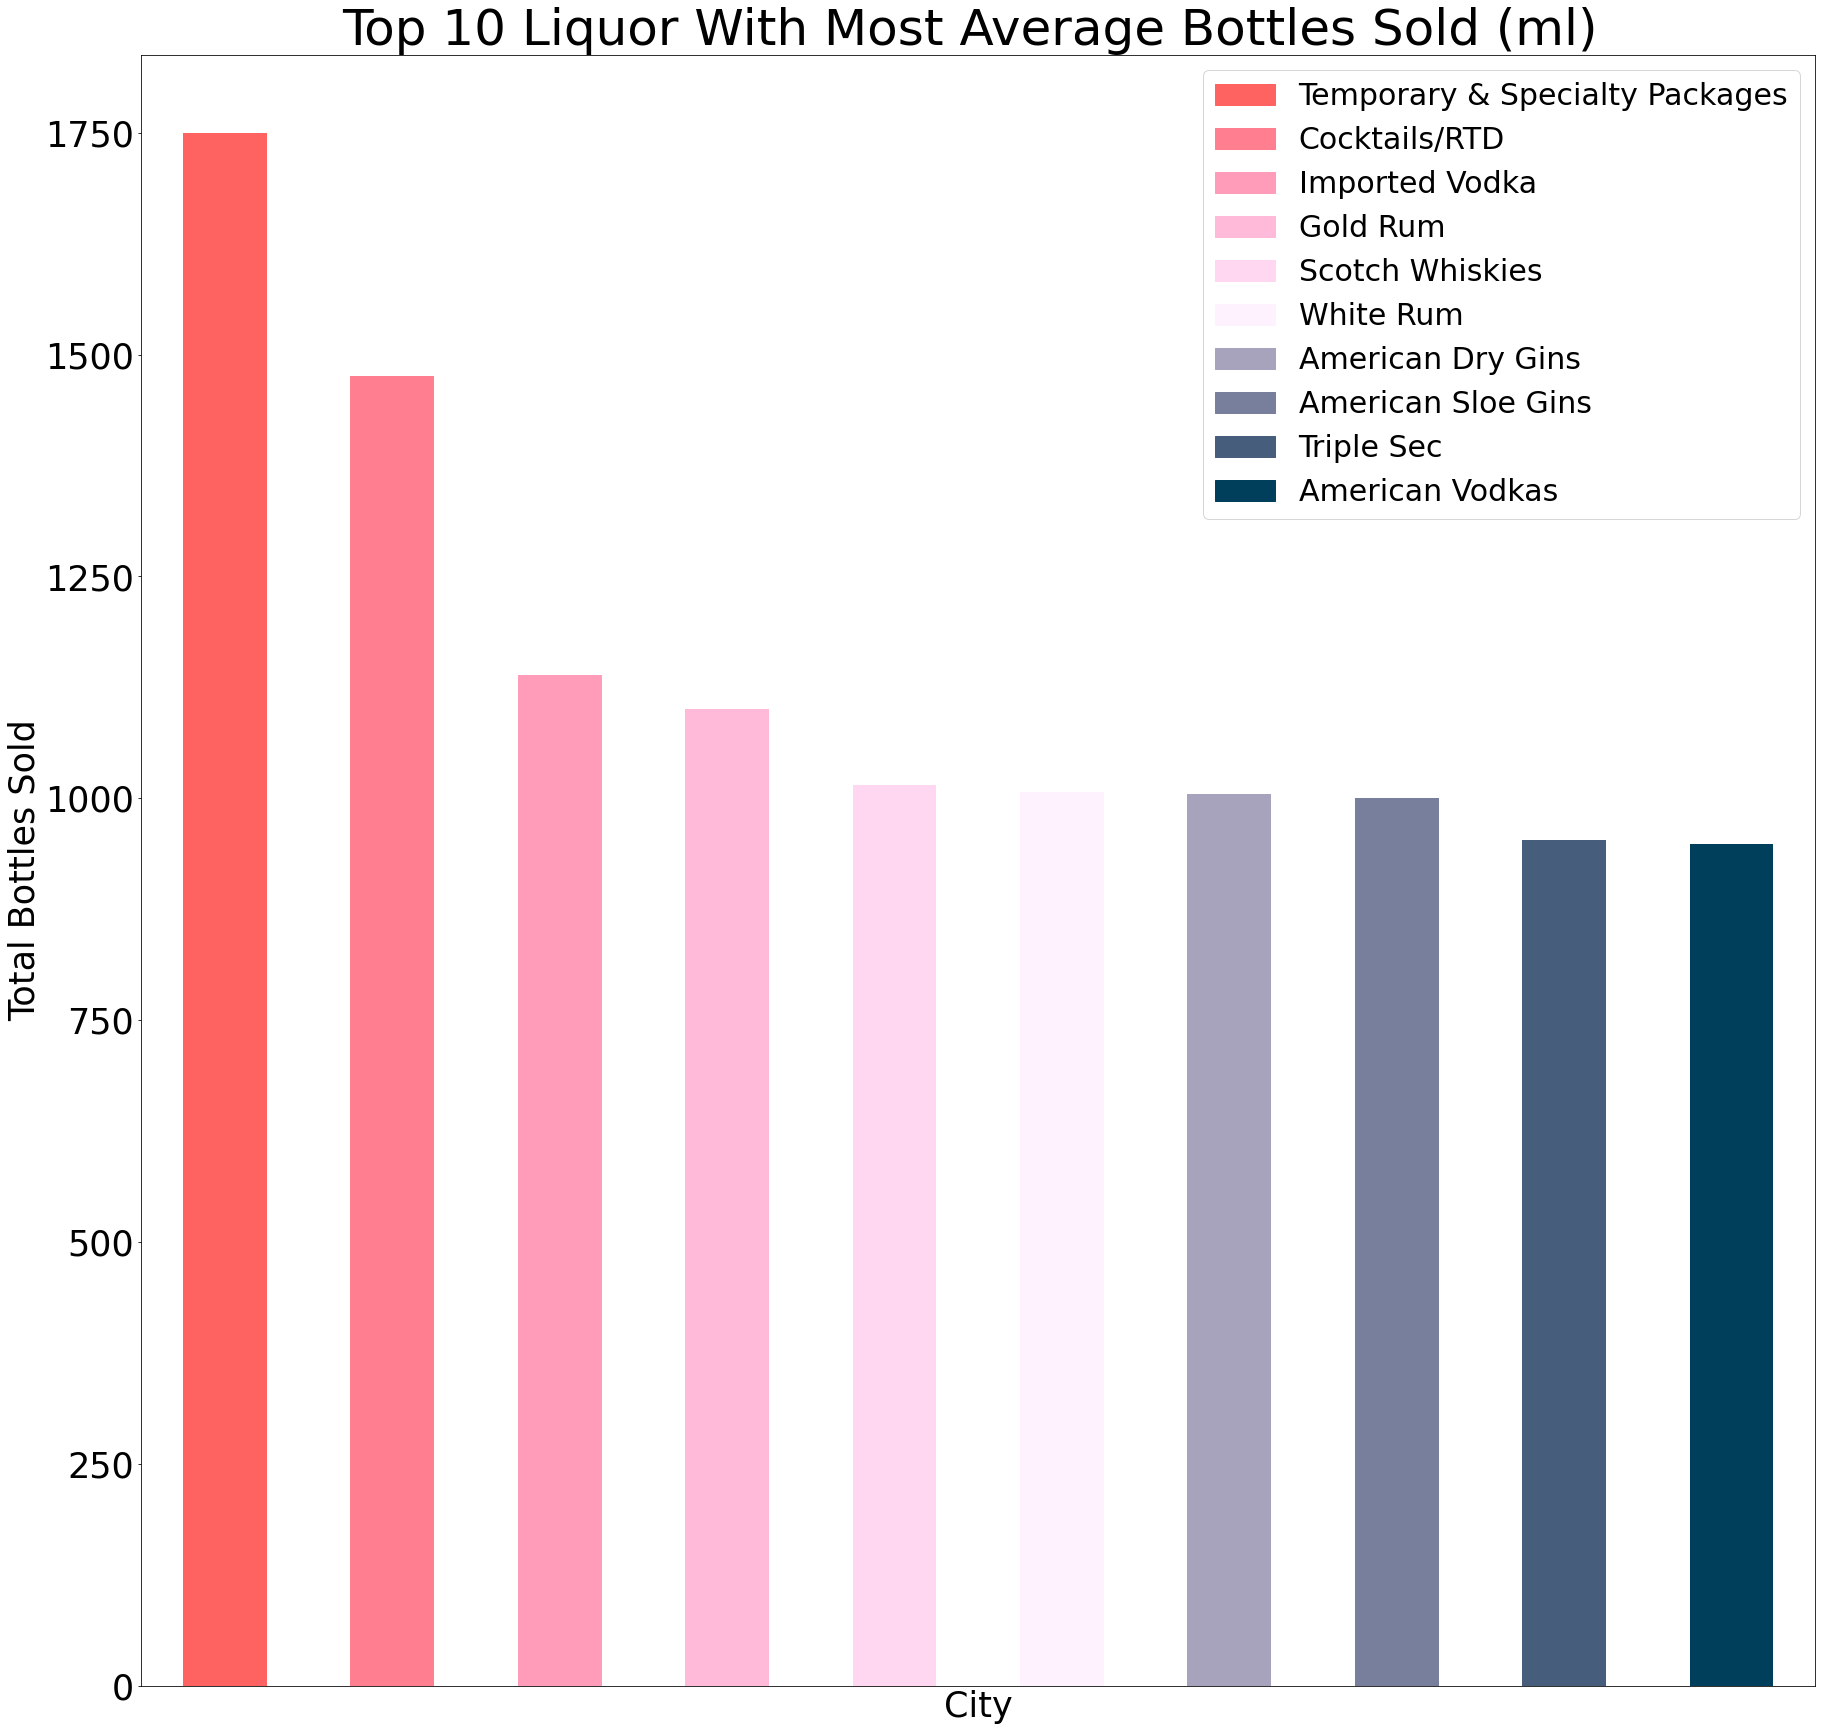

In [45]:
##Mengatur warna yang ingin digunakan
barcolor=['#ff6361', '#ff7e90', '#ff9cb9', '#ffbada', '#ffd7f1', '#fff2ff', '#a7a3bc', '#777f9c', '#465e7c', '#003f5c']

#Bar chart
databar.plot(kind='bar', figsize=(30, 30), color=barcolor, fontsize=35)

#Menghilangkan sumbu x
plt.xticks([]) 

#Mengatur ukuran label
plt.xlabel("City", fontsize=35)
plt.ylabel("Total Bottles Sold", fontsize=35)
plt.title("Top 10 Liquor With Most Average Bottles Sold (ml) ", fontsize=50)

#Mengatur legenda
patch1 = mpatches.Patch(color='#ff6361', label='Temporary & Specialty Packages')
patch2 = mpatches.Patch(color='#ff7e90', label='Cocktails/RTD')
patch3 = mpatches.Patch(color='#ff9cb9', label='Imported Vodka')
patch4 = mpatches.Patch(color='#ffbada', label='Gold Rum')
patch5 = mpatches.Patch(color='#ffd7f1', label='Scotch Whiskies')
patch6 = mpatches.Patch(color='#fff2ff', label='White Rum')
patch7 = mpatches.Patch(color='#a7a3bc', label='American Dry Gins')
patch8 = mpatches.Patch(color='#777f9c', label='American Sloe Gins')
patch9 = mpatches.Patch(color='#465e7c', label='Triple Sec')
patch10 = mpatches.Patch(color='#003f5c', label='American Vodkas')
plt.legend(handles=[patch1,patch2,patch3,patch4,patch5,patch6,patch7,patch8,patch9,patch10], fontsize=30)

## Insight V (Wordcloud)

In [58]:
#Mendefinikan data yang akan dipakai dilihat dari nama liquor yang dipesan selama satu tahun terakhir
dataword = " ".join(title for title in data.category_name)

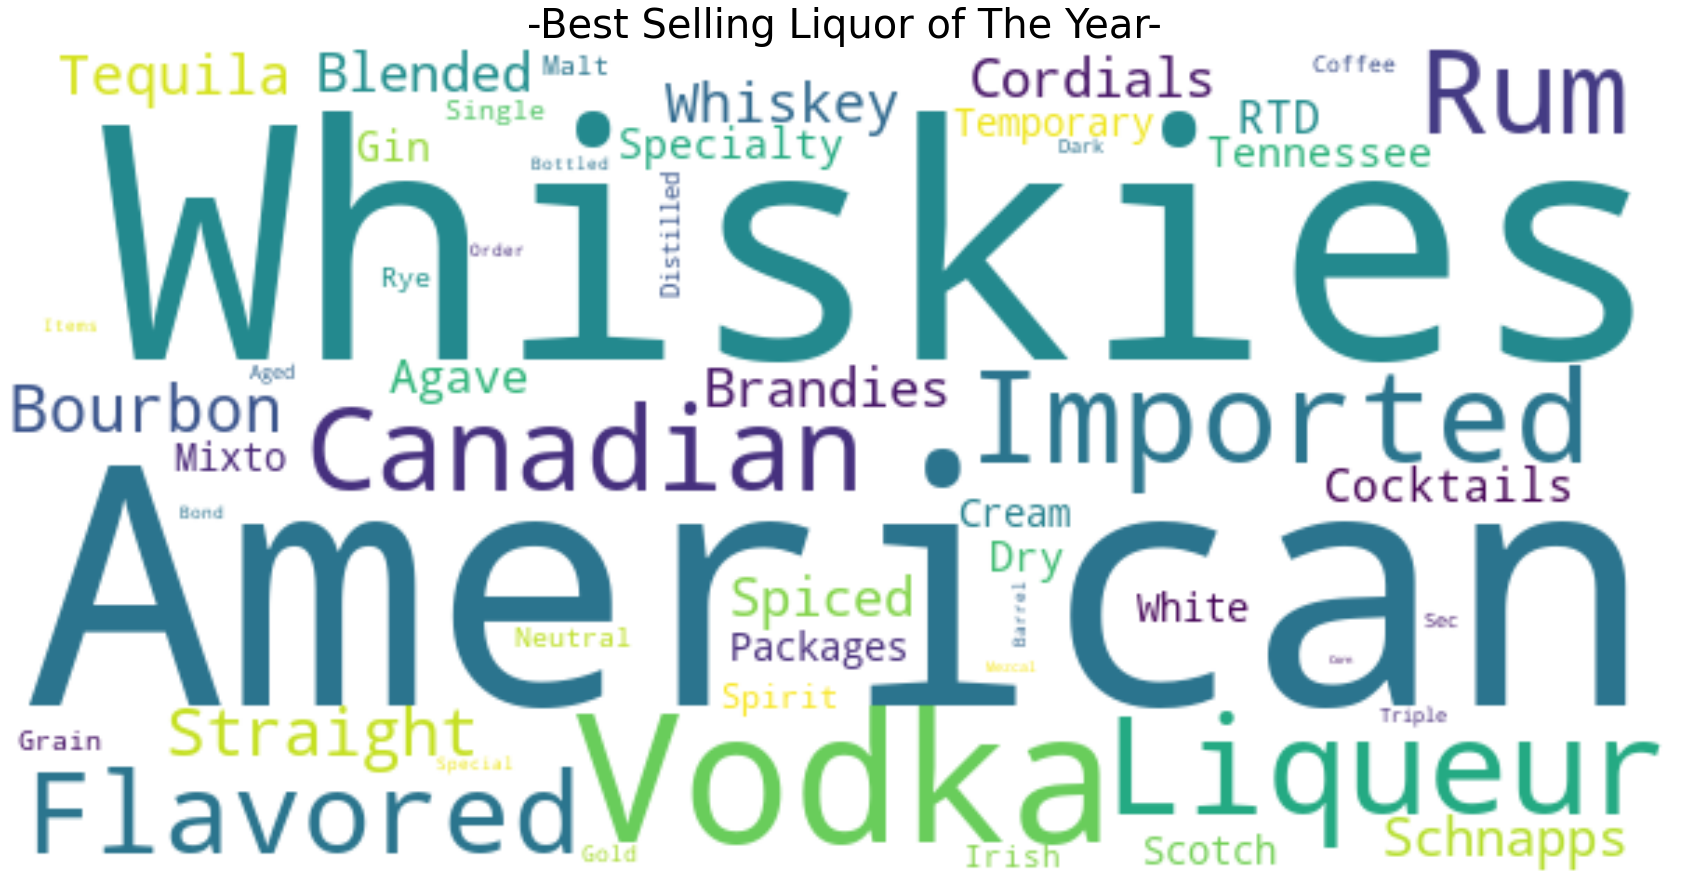

In [59]:
#Mengatur ukuran frame
fig = plt.figure(figsize=(30, 30))

#Wordcloud
word_cloud = WordCloud(width=600, height=300,  background_color="white", collocations=False).generate(dataword)

#Menampilkan judul visualisasi
plt.title("-Best Selling Liquor of The Year-", fontsize=40)

#Menghilangkan sumbu x dan y
plt.axis("off")

#Menampilkan chart
plt.imshow(word_cloud, interpolation='bilinear')
plt.show()